In [25]:
#Modules being used 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [26]:
#Dataset being used

data=pd.read_csv(r"C:\Users\ARJUN KRISHNA\Desktop\AI Notes\spotify dataset.csv")
data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


DATA PRE-PROCESSING

In [27]:
#Checking for Null values

data.isnull().sum()


track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [46]:
#Removing Records with null values

data['track_name'].dropna(inplace=True)
data['track_artist'].dropna(inplace=True)
data['track_album_name'].dropna(inplace=True)

In [29]:
#Converting categorical data to numerical data

genre=LabelEncoder()
subgenre=LabelEncoder()
data['play_genre']=genre.fit_transform(data['playlist_genre'])
data['play_subgenre']=subgenre.fit_transform(data['playlist_subgenre'])





In [30]:
data['duration_min'] = data['duration_ms'] / 60000



In [31]:
#Standardizing the numerical features

num_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min']

scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])



EXPLORATORY DATA ANALYSIS AND VISUALIZATION

1. UNIVARIATE ANALYSIS

(array([  67.,  242.,  566., 1321., 2691., 4276., 5836., 6877., 6623.,
        4334.]),
 array([-3.8607859 , -3.30811327, -2.75544065, -2.20276803, -1.65009541,
        -1.09742279, -0.54475017,  0.00792245,  0.56059507,  1.11326769,
         1.66594032]),
 <BarContainer object of 10 artists>)

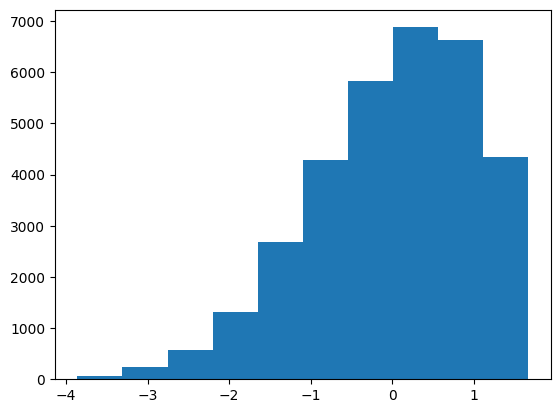

In [32]:


plt.hist(x='energy',data=data)


(array([3.000e+00, 6.900e+01, 4.110e+02, 1.193e+03, 2.894e+03, 5.398e+03,
        8.034e+03, 8.651e+03, 5.049e+03, 1.131e+03]),
 array([-4.51361648, -3.8360738 , -3.15853111, -2.48098843, -1.80344575,
        -1.12590307, -0.44836039,  0.22918229,  0.90672497,  1.58426765,
         2.26181033]),
 <BarContainer object of 10 artists>)

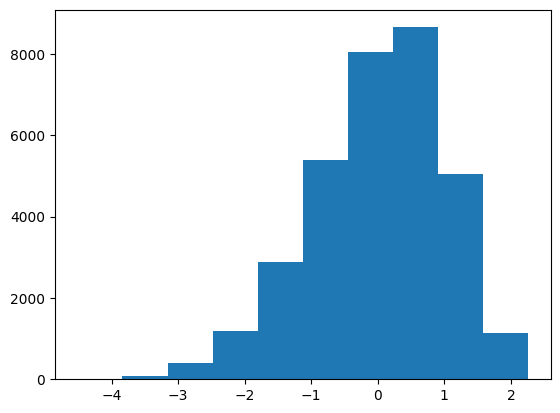

In [33]:
plt.hist(x='danceability',data=data)


(array([1.000e+00, 0.000e+00, 5.000e+00, 2.000e+00, 2.100e+01, 1.170e+02,
        1.087e+03, 6.677e+03, 2.178e+04, 3.143e+03]),
 array([-13.2942786 , -11.69733221, -10.10038583,  -8.50343945,
         -6.90649307,  -5.30954668,  -3.7126003 ,  -2.11565392,
         -0.51870754,   1.07823885,   2.67518523]),
 <BarContainer object of 10 artists>)

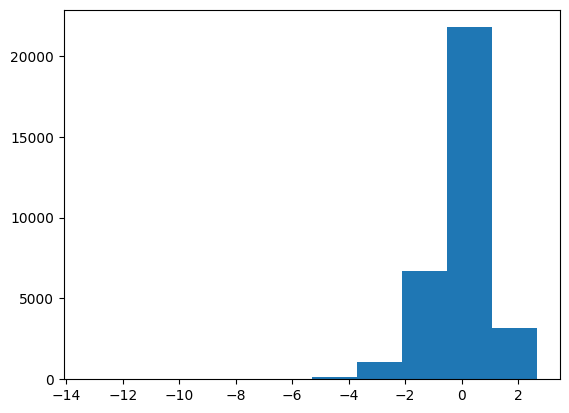

In [34]:
plt.hist(x='loudness',data=data)


(array([1.0000e+00, 4.0000e+00, 1.8900e+02, 6.3210e+03, 8.3840e+03,
        1.2129e+04, 3.3170e+03, 2.1500e+03, 3.3400e+02, 4.0000e+00]),
 array([-4.49318544, -3.60318027, -2.7131751 , -1.82316993, -0.93316476,
        -0.04315958,  0.84684559,  1.73685076,  2.62685593,  3.5168611 ,
         4.40686627]),
 <BarContainer object of 10 artists>)

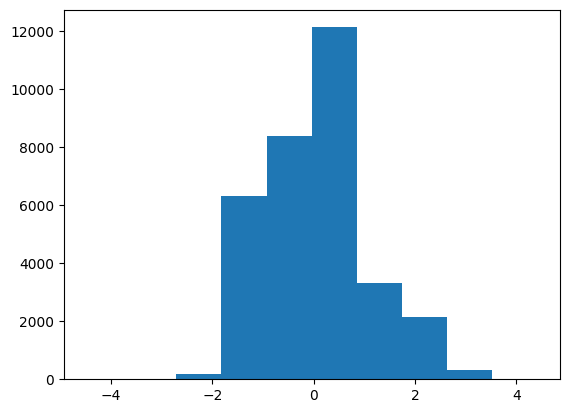

In [35]:
plt.hist(x='tempo',data=data)


(array([   21.,   244.,  2351., 11854., 11232.,  4560.,  1556.,   589.,
          257.,   169.]),
 array([-3.70697541, -2.84823661, -1.98949781, -1.13075902, -0.27202022,
         0.58671858,  1.44545737,  2.30419617,  3.16293497,  4.02167376,
         4.88041256]),
 <BarContainer object of 10 artists>)

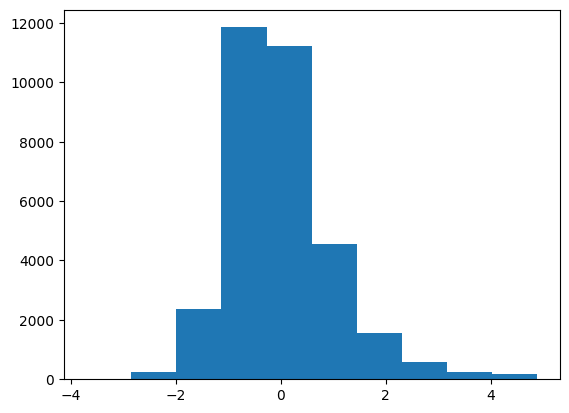

In [36]:
plt.hist(x='duration_min',data=data)


(array([ 961., 2583., 3400., 4270., 4357., 4814., 4241., 3776., 2758.,
        1673.]),
 array([-2.18991021, -1.76484814, -1.33978608, -0.91472401, -0.48966195,
        -0.06459988,  0.36046218,  0.78552424,  1.21058631,  1.63564837,
         2.06071044]),
 <BarContainer object of 10 artists>)

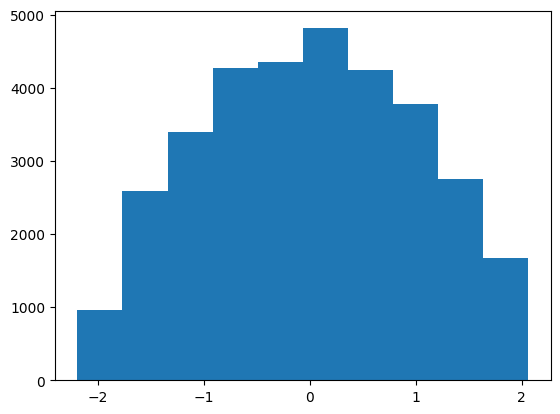

In [37]:
plt.hist(x='valence',data=data)


<BarContainer object of 32833 artists>

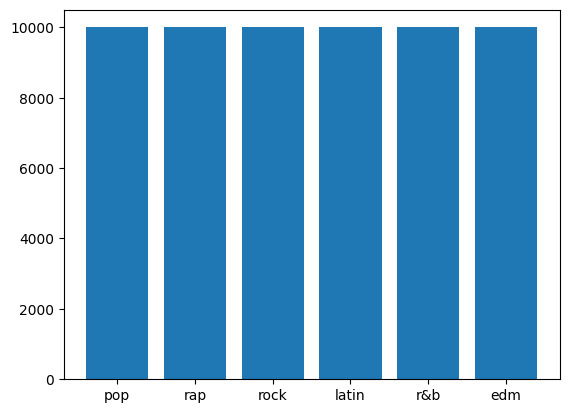

In [38]:
plt.bar(x='playlist_genre',data=data,height=10000)


BIVARIATE ANALYSIS

<Axes: xlabel='danceability', ylabel='playlist_genre'>

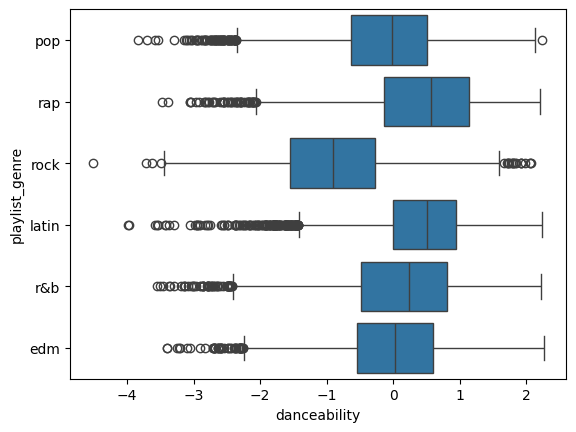

In [39]:
sns.boxplot(x='danceability',y='playlist_genre',data=data)

<Axes: xlabel='energy', ylabel='valence'>

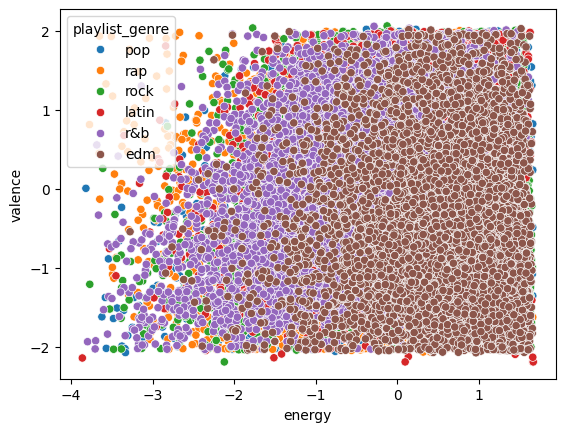

In [40]:
sns.scatterplot(x='energy',y='valence',data=data,hue='playlist_genre')

<Axes: xlabel='energy', ylabel='valence'>

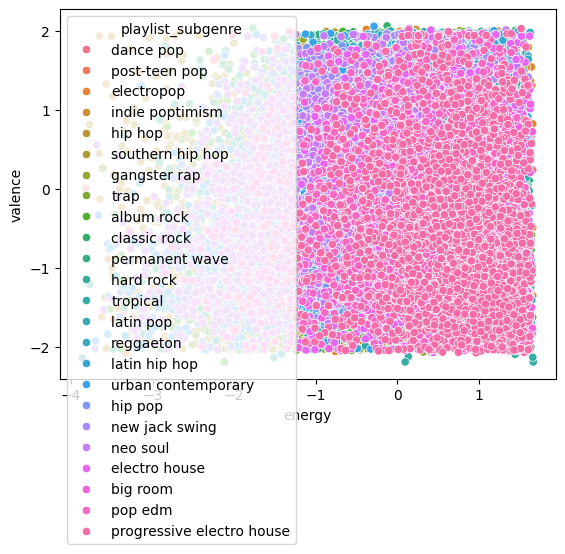

In [41]:
sns.scatterplot(x='energy',y='valence',data=data,hue='playlist_subgenre')

HEATMAP

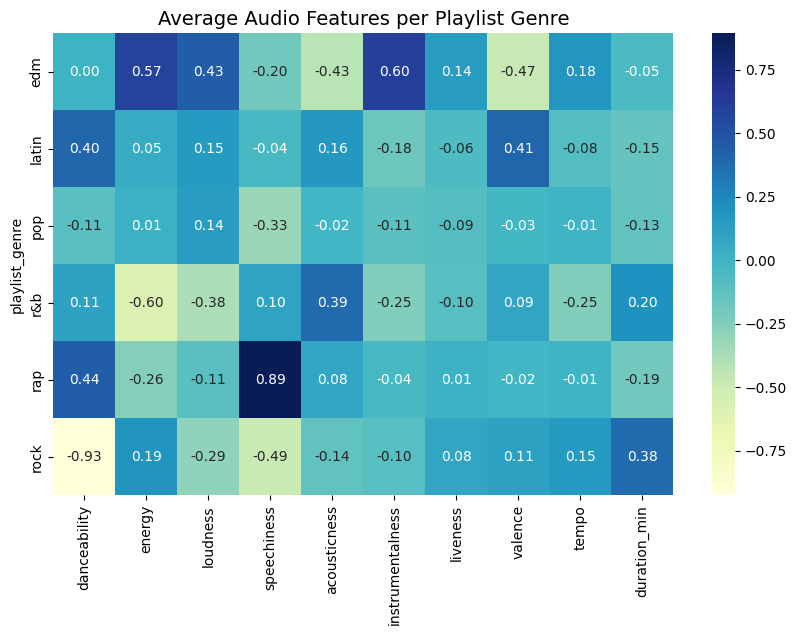

In [42]:

genre_features = data.groupby('playlist_genre')[num_cols].mean()

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(genre_features, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Audio Features per Playlist Genre", fontsize=14)
plt.show()


CLUSTERING ANALYSIS

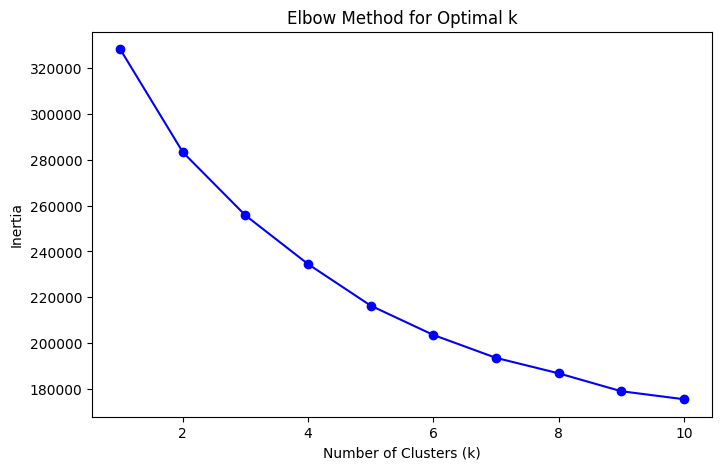

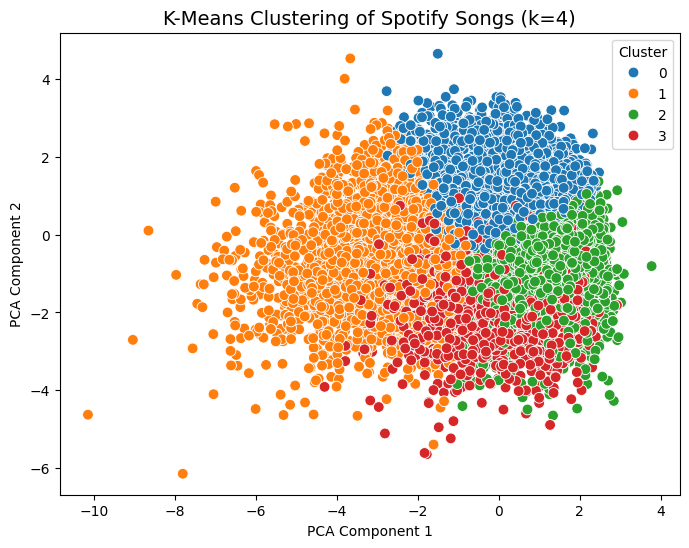

In [43]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 
            'valence', 'tempo', 'duration_ms']

X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
K = range(1, 11)  # Try k from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

#Reducing dimensions for plotting 
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='pca1', y='pca2', hue='cluster', palette='tab10', s=60)
plt.title(f'K-Means Clustering of Spotify Songs (k={optimal_k})', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

VISUALIZING CLUSTERS WITH FEATURE PROFILES

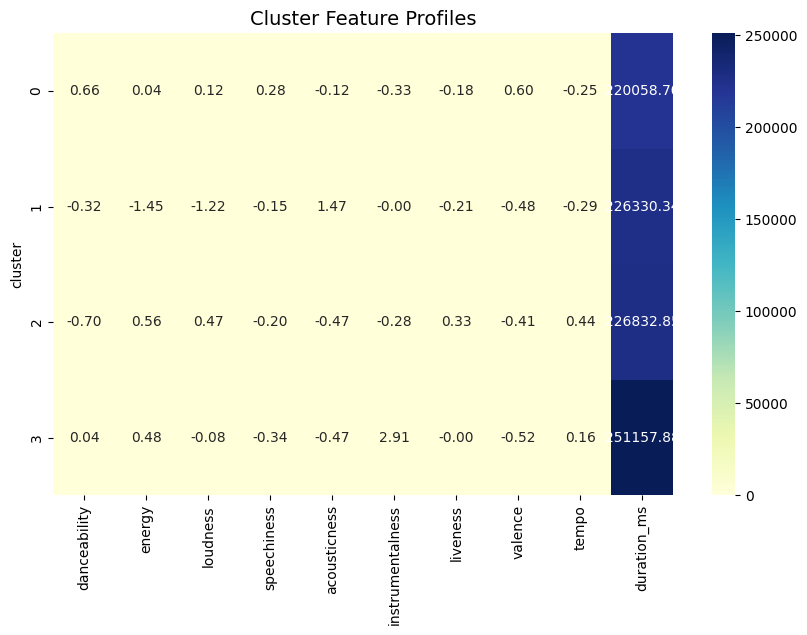

In [44]:


# Average feature values per cluster
cluster_profile = data.groupby('cluster')[features].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Cluster Feature Profiles", fontsize=14)
plt.show()


RECOMMENDATION MODELS

In [45]:
def recommend_song(song_name, method='cosine', top_n=5):
    """
    Recommend songs similar to the given song_name.
    
    Parameters:
    - song_name: str, track name in df
    - method: 'cosine' or 'euclidean'
    - top_n: number of recommendations
    """
    # Find all rows for the given song name
    song_rows = data[data['track_name'].str.lower() == song_name.lower()]
    if song_rows.empty:
        return f"Song '{song_name}' not found in dataset."
    
    # Use the first occurrence's index
    idx = song_rows.index[0]
    
    # Standardize features
    X_scaled = scaler.fit_transform(data[features])
    
    # Compute similarity or distance
    if method == 'cosine':
        sim_matrix = cosine_similarity(X_scaled)
        scores = sim_matrix[idx]
        similar_idx = np.argsort(scores)[::-1]  # high → low
    elif method == 'euclidean':
        dist_matrix = euclidean_distances(X_scaled)
        scores = dist_matrix[idx]
        similar_idx = np.argsort(scores)  # low → high
    else:
        return "Invalid method. Choose 'cosine' or 'euclidean'."
    
    # Remove all rows that have the same track_name as the input
    same_song_indices = data[data['track_name'].str.lower() == song_name.lower()].index
    similar_idx = [i for i in similar_idx if i not in same_song_indices]
    
    # Get top N unique songs
    recommendations = data.iloc[similar_idx][['track_name', 'track_artist', 'playlist_genre']].drop_duplicates(subset=['track_name']).head(top_n)
    
    return recommendations

# Example usage:
print("Cosine Similarity Recommendations:")
print(recommend_song("Heartless", method='cosine', top_n=5))

print("\nEuclidean Distance Recommendations:")
print(recommend_song("Heartless", method='euclidean', top_n=5))

Cosine Similarity Recommendations:
                                          track_name    track_artist  \
8317              Lord Pretty Flacko Jodye 2 (LPFJ2)      A$AP Rocky   
4538                                 Let Me Love You        DJ Snake   
14797                                    Come Around      Papa Roach   
2074                                      Fight Song  Rachel Platten   
29310  Shot Me Down (feat. Skylar Grey) - Radio Edit    David Guetta   

      playlist_genre  
8317             rap  
4538             pop  
14797           rock  
2074             pop  
29310            edm  

Euclidean Distance Recommendations:
                             track_name    track_artist playlist_genre
2074                         Fight Song  Rachel Platten            pop
10517                              Fire          Türküm            rap
4572                        Whole Heart         Gryffin            pop
451                           POP/STARS            K/DA            pop
27